In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv('divar_posts_dataset.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

**investigating dataset**


In [8]:
# first five records
data.head()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN


In [9]:
# information about columns and type of them and ...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947635 entries, 0 to 947634
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       947635 non-null  int64  
 1   archive_by_user  947635 non-null  bool   
 2   brand            190892 non-null  object 
 3   cat1             947635 non-null  object 
 4   cat2             945877 non-null  object 
 5   cat3             775301 non-null  object 
 6   city             947635 non-null  object 
 7   created_at       947635 non-null  object 
 8   desc             947635 non-null  object 
 9   id               947635 non-null  int64  
 10  image_count      947635 non-null  int64  
 11  mileage          120451 non-null  float64
 12  platform         947635 non-null  object 
 13  price            947635 non-null  int64  
 14  title            947635 non-null  object 
 15  type             98529 non-null   object 
 16  year             120451 non-null  obje

In [10]:
data.describe()

,Unnamed: 0,id,image_count,mileage,price
count,947635.000000,9.476350e+05,947635.000000,120451.000000,9.476350e+05
mean,473817.000000,3.363293e+13,1.785852,100862.291944,3.398462e+06
std,273558.805509,1.944109e+13,1.127712,98368.470916,1.371741e+07
min,0.000000,5.950553e+07,0.000000,0.000000,-1.000000e+00
25%,236908.500000,1.677974e+13,1.000000,19000.000000,3.000000e+04
50%,473817.000000,3.362242e+13,2.000000,75000.000000,1.500000e+05
75%,710725.500000,5.049560e+13,2.000000,160000.000000,6.000000e+05
max,947634.000000,6.728036e+13,16.000000,500000.000000,4.000000e+08


<AxesSubplot:>

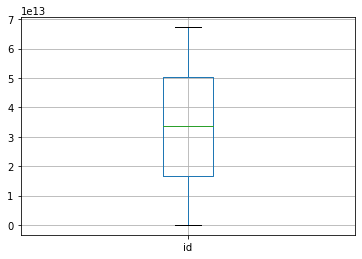

In [11]:
data.boxplot(column=['id'])


<AxesSubplot:>

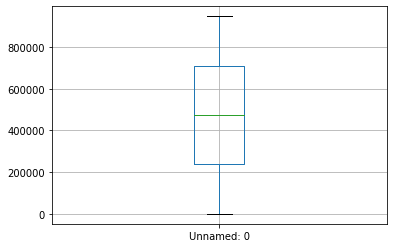

In [12]:
data.boxplot(column=['Unnamed: 0'])


<AxesSubplot:>

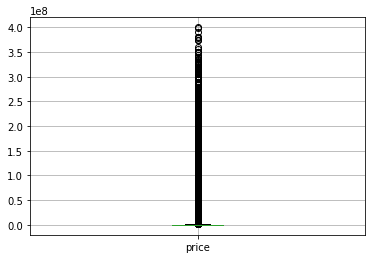

In [13]:
data.boxplot(column=['price'])

<AxesSubplot:>

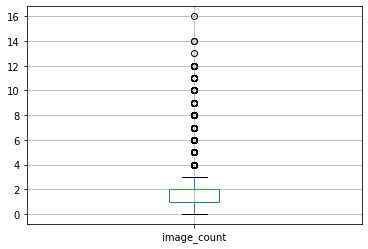

In [14]:
data.boxplot(column=['image_count'])


<AxesSubplot:>

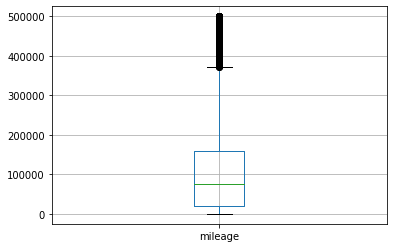

In [15]:
data.boxplot(column=['mileage'])


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
**outliers data**

To show the  outliers data, we calculate IQR for each column, which is as follows.

In [16]:
# outliers > 1.5*(Q3-Q1) | outliers > 1.5*(Q3-Q1)
dmile=data['mileage'].dropna()
# np.percentile(d, 75)+1.5*(np.percentile(d, 75)-np.percentile(d, 25))
outliers_id=np.percentile(data['id'], 75)+1.5*(np.percentile(data['id'], 75)-np.percentile(data['id'], 25))
outliers_idB=np.percentile(data['id'], 25)-1.5*(np.percentile(data['id'], 75)-np.percentile(data['id'], 25))
outliers_price=np.percentile(data['price'], 75)+1.5*(np.percentile(data['price'], 75)-np.percentile(data['price'], 25))
outliers_priceB=np.percentile(data['price'], 25)-1.5*(np.percentile(data['price'], 75)-np.percentile(data['price'], 25))
outliers_image_count=np.percentile(data['image_count'], 75)+1.5*(np.percentile(data['image_count'], 75)-np.percentile(data['image_count'], 25))
outliers_image_countB=np.percentile(data['image_count'], 25)-1.5*(np.percentile(data['image_count'], 75)-np.percentile(data['image_count'], 25))
outliers_mileage=np.percentile(dmile, 75)+1.5*(np.percentile(dmile, 75)-np.percentile(dmile, 25))
outliers_mileageB=np.percentile(dmile, 25)-1.5*(np.percentile(dmile, 75)-np.percentile(dmile, 25))
outliers_Unnamed=np.percentile(data['Unnamed: 0'], 75)+1.5*(np.percentile(data['Unnamed: 0'], 75)-np.percentile(data['Unnamed: 0'], 25))
outliers_UnnamedB=np.percentile(data['Unnamed: 0'], 25)-1.5*(np.percentile(data['Unnamed: 0'], 75)-np.percentile(data['Unnamed: 0'], 25))


In [17]:
# we calculat mode for each column
from scipy.stats import mode
Unnamed_arr=data['Unnamed: 0'].values
id_arr=data['id'].values
image_count_arr=data['image_count'].values
mileage_arr=data['mileage'].values
price_arr=data['price'].values
mode_info_of_unnamed=mode(Unnamed_arr)
mode_info_of_id=mode(id_arr)
mode_info_of_image_count=mode(image_count_arr)
mode_info_of_mileage=mode(mileage_arr)
mode_info_of_price=mode(price_arr)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
**Q1**

We created a data frame for the required description table in question number one of the project.

In [18]:
decribe_data_table = pd.DataFrame({
    
    'name':['id','price','image_count','mileage','Unnamed'],
    
    'min':[data['id'].min(),data['price'].min(),data['image_count'].min(),data['mileage'].min(),data['Unnamed: 0'].min()],
    
    'max':[data['id'].max(),data['price'].max(),data['image_count'].max(),data['mileage'].max(),data['Unnamed: 0'].max()],
    
    'mean':[data['id'].mean(),data['price'].mean(),data['image_count'].mean(),data['mileage'].mean(),data['Unnamed: 0'].mean()],
    
    'median':[data['id'].median(),data['price'].median(),data['image_count'].median(),
             data['mileage'].median(),data['Unnamed: 0'].median()],
    
    'mode':[mode_info_of_id[0],mode_info_of_price[0],mode_info_of_image_count[0], mode_info_of_mileage[0],mode_info_of_unnamed[0]],
    
    'outliers':[
                   [data['id'][data['id']>outliers_id]]+[data['id'][data['id']<outliers_idB]],
                   [data['price'][data['price']>outliers_price]]+[data['price'][data['price']<outliers_priceB]],
                   [data['image_count'][data['image_count']>outliers_image_count]]+[data['image_count'][data['image_count']<outliers_image_countB]],
                   [data['mileage'][data['mileage']>outliers_mileage]]+[data['mileage'][data['mileage']<outliers_mileageB]],
                   [data['Unnamed: 0'][data['Unnamed: 0']>outliers_Unnamed]]+[data['Unnamed: 0'][data['Unnamed: 0']<outliers_UnnamedB]]
    ],
    'type':[data['id'].dtype,data['price'].dtype,data['image_count'].dtype,data['mileage'].dtype,data['Unnamed: 0'].dtype],
    
    'range':['[0,+infinite)','[0,+infinite)','[0,16]','[0,500000]','[0,+infinite]']
                    
}, columns=['name','min','max','mean','median','mode','outliers','range','type'])

In [19]:
decribe_data_table

,name,min,max,mean,median,mode,outliers,range,type
0,id,59505527.0,6.728036e+13,3.363293e+13,3.362242e+13,[59505527],"[[], []]","[0,+infinite)",int64
1,price,-1.0,4.000000e+08,3.398462e+06,1.500000e+05,[-1],"[[3850000, 8500000, 19500000, 23900000, 850000...","[0,+infinite)",int64
2,image_count,0.0,1.600000e+01,1.785852e+00,2.000000e+00,[1],"[[5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4,...","[0,16]",int64
3,mileage,0.0,5.000000e+05,1.008623e+05,7.500000e+04,[200000.0],"[[450000.0, 440000.0, 380000.0, 400000.0, 3800...","[0,500000]",float64
4,Unnamed,0.0,9.476340e+05,4.738170e+05,4.738170e+05,[0],"[[], []]","[0,+infinite]",int64


<AxesSubplot:ylabel='cat1'>

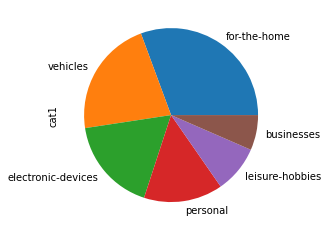

In [20]:
data['cat1'].value_counts().plot(kind='pie')  
#  data['city'].value_counts().plot(kind='pie')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
**data cleaning :**

missing value , duplicated value , ...

In [21]:
# missing value
pd.isnull(data).sum()
# data.fillna(-1)

Unnamed: 0              0
archive_by_user         0
brand              756743
cat1                    0
cat2                 1758
cat3               172334
city                    0
created_at              0
desc                    0
id                      0
image_count             0
mileage            827184
platform                0
price                   0
title                   0
type               849106
year               827184
dtype: int64

In [22]:
# duplicated value

# data.drop_duplicates()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
**Q2**
**validation**

**TITLE** :
    Title must have at least 3 chars.	  <font color='green'>Solution</font> : using char count from String library.

	
    
**CITY** :
Creating a list of valid cities and check if the city attribute matches any cities of our list

**TIME** :
Creating a list of week days and compare to see if week day attribute matches any of our list.
Time format should be between 1-12 + AM/PM.

**PRICE** :
Price value can’t be < 0.  <font color='green'>Solution</font> : using a simple if statement

**YEAR** :
	Year can’t be < 1950.     Title must have at least 3 chars.	  <font color='green'>Solution</font> : using char count from String library.
: using a simple if statement
	Year can’t be a negative value.  <font color='green'>Solution</font> : using a simple if statement
	Year can’t be > current year.  <font color='green'>Solution</font> : get current year using Time library + comparing both   Values.

**DESCRIPTION** :
Description can’t be in any language but Persian.  <font color='green'>Solution</font> : Used chars Unicode values should be in range of Persian Unicode 

**values** :
	Description can’t be less than 10 chars.  <font color='green'>Solution</font> : char count
    
**IMAGE COUNT** :
	Image count value can’t be less than zero.  <font color='green'>Solution</font> : using a simple if statement
	
**ID** :
	Id must be a 14 digit integer.  <font color='green'>Solution</font> : using a simple if statement
	Id can’t be less than zero.  <font color='green'>Solution</font> : using a simple if statement
    
**MILEAGE** :
	Mileage value must be NaN or None for all non-vehicle products.  <font color='green'>Solution</font> : using a simple if statement
	All vehicle product must have a mileage value.  <font color='green'>Solution</font> : using a simple if statement
	Mileage can’t be less than zero.  <font color='green'>Solution</font> : using a simple if statement





![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
**Q3**
**accuracy**

To measure the grammatical accuracy of the data, we can compare all attribute values with the domain that we manually enter for each attribute. And to measure the semantic accuracy of the data, compare all the data with different data and discover the errors, or manually correct part of the data and compare it with the rest of the data that has not been corrected yet.

We can slso examine the columns that are related and correlated with each other and compare their data, and if there is a discrepancy that violates the correlation, we will find incorrect and inaccurate data. 


In [23]:
data.corr(method='pearson', min_periods=1)

,Unnamed: 0,archive_by_user,id,image_count,mileage,price
Unnamed: 0,1.000000,0.000735,-0.002399,0.000745,0.000414,-0.000571
archive_by_user,0.000735,1.000000,0.000547,0.039529,-0.066126,0.002919
id,-0.002399,0.000547,1.000000,-0.000338,0.002110,-0.001036
image_count,0.000745,0.039529,-0.000338,1.000000,0.065899,0.031879
mileage,0.000414,-0.066126,0.002110,0.065899,1.000000,-0.152146
price,-0.000571,0.002919,-0.001036,0.031879,-0.152146,1.000000


For example, in the table above, the negative correlation of maileage and price indicates that with more maileage, the price decreases and vice versa! If this relationship is not established and, for example, the price increases with the increase of mileage, there is a possibility of a mistake.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

**Q4 Completeness**

Measurement Function A/B 

*1:*

A: records with no missing attribute

B: Total records in a dataset

*2:*

A: number of data required for the particular context in the data file

B: number of data in the specified particular context of intended use

*3:*

A: attribute fields containing values 

B: records × attributes


In [24]:
# 1
A=data.dropna(axis=0).shape[0]
B=data['Unnamed: 0'].count()
A/B

0.0

In [25]:
# 2.1

data_c=data.drop(columns=['cat3','cat2','cat1','year','archive_by_user','brand','mileage'])
A=data_c.dropna(axis=0).shape[0]
B=data_c['Unnamed: 0'].count()
A/B

0.10397357632421765

In [26]:
# 2.3

A=data_c[data.notnull()].count().sum()
B=data_c['Unnamed: 0'].count()*10
A/B

0.9103973576324218

In [27]:
# 3
A=data[data.notnull()].count().sum()
B=data['Unnamed: 0'].count()*17
A/B

0.7868185783866275

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
**Q5**


product price prediction in the coming years

popular product prediction in the coming years

Popular product in different cities

Estimate the needs of the people of a city for a particular product

Price relationship with popular product

Price relationship with the city

The relationship between photos and popularity

The relationship between buying products in different cities and the relationship between selling posts in different cities


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Exercise #1#2


In [28]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])
cities=pd.DataFrame({ 'City name': city_names, 'Population': population })
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities


,City name,Population,Area square miles
0,San Francisco,852469,46.87
1,San Jose,1015785,176.53
2,Sacramento,485199,97.92


In [29]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Is wide and has saint name
0,San Francisco,852469,46.87,False
1,San Jose,1015785,176.53,True
2,Sacramento,485199,97.92,False


In [30]:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area square miles,Is wide and has saint name
0,San Francisco,852469.0,46.87,False
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,False
